In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
cars = pd.read_csv(r"C:\Users\POOJA\OneDrive\Desktop\Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [9]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

EDA

In [12]:
import warnings
warnings.filterwarnings('ignore')

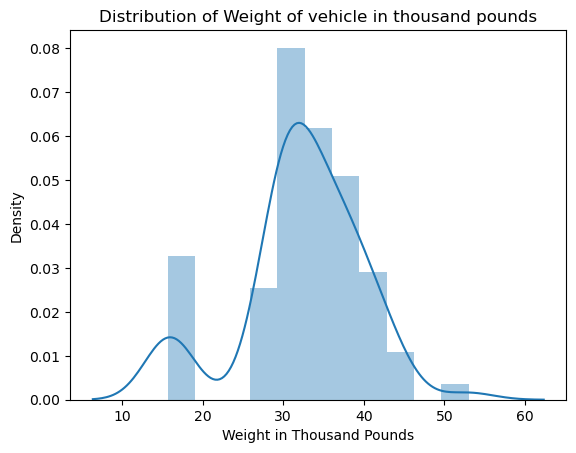

In [14]:
sns.distplot(x=cars['WT'])
plt.title('Distribution of Weight of vehicle in thousand pounds')
plt.xlabel('Weight in Thousand Pounds')
plt.show()

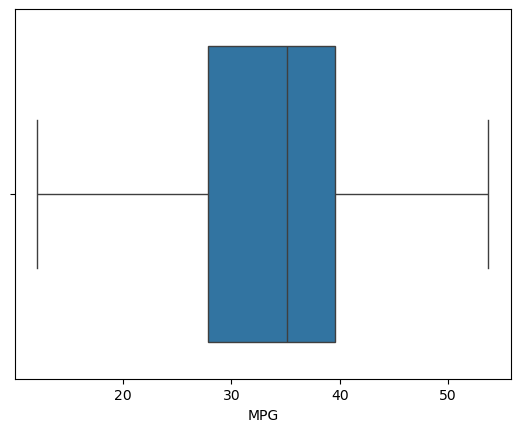

In [16]:
import seaborn as sns
sns.boxplot(x=cars['MPG'])
plt.show()

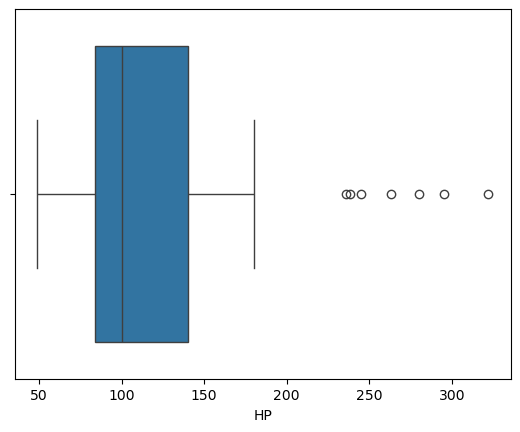

In [18]:

sns.boxplot(x=cars['HP'])
plt.show()

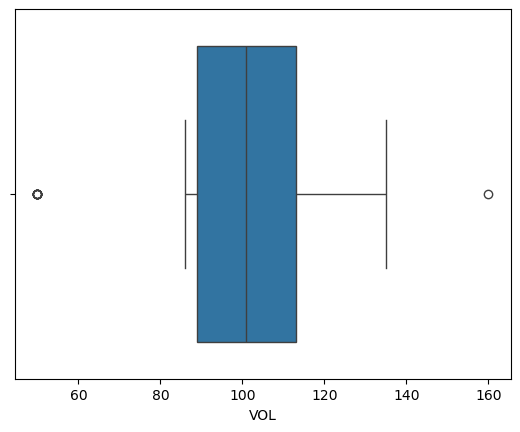

In [20]:
sns.boxplot(x=cars['VOL'])
plt.show()

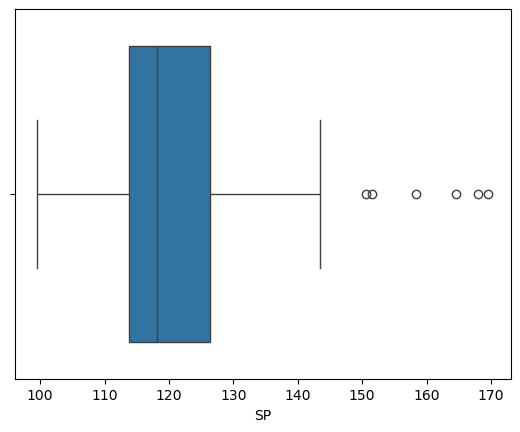

In [22]:
sns.boxplot(x=cars['SP'])
plt.show()

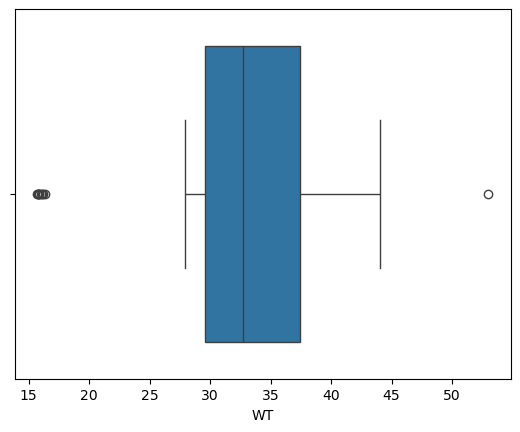

In [24]:

sns.boxplot(x=cars['WT'])
plt.show()

<Axes: xlabel='VOL', ylabel='MPG'>

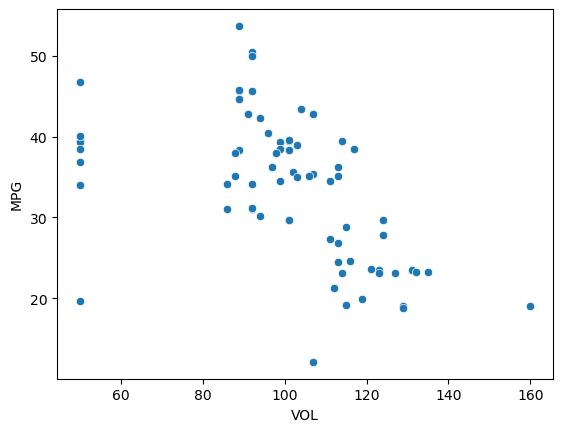

In [26]:
from seaborn import scatterplot

scatterplot(x=cars['VOL'],y=cars['MPG'])

<Axes: xlabel='WT', ylabel='MPG'>

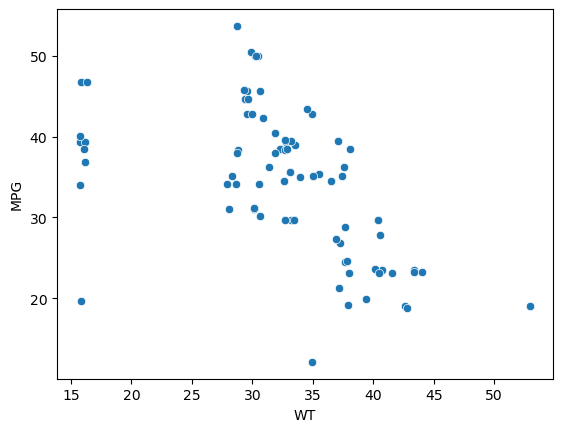

In [28]:
scatterplot(x=cars['WT'],y=cars['MPG'])

<Axes: xlabel='SP', ylabel='MPG'>

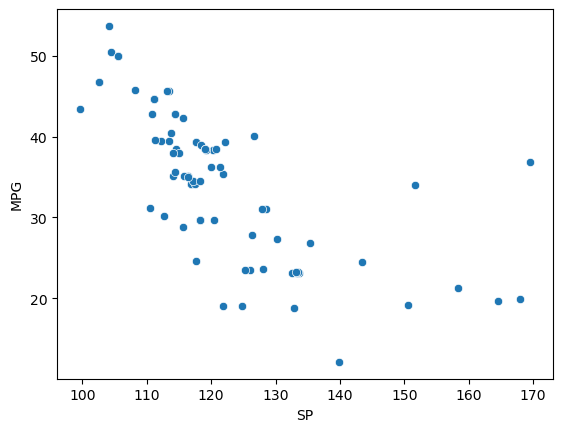

In [30]:
scatterplot(x=cars['SP'],y=cars['MPG'])

<Axes: xlabel='VOL', ylabel='HP'>

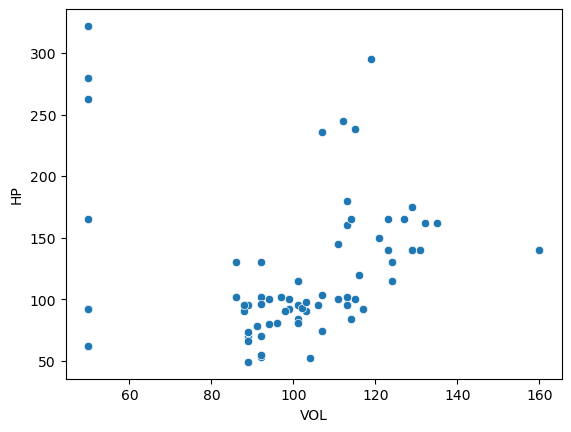

In [32]:
scatterplot(x=cars['VOL'],y=cars['HP'])

<Axes: >

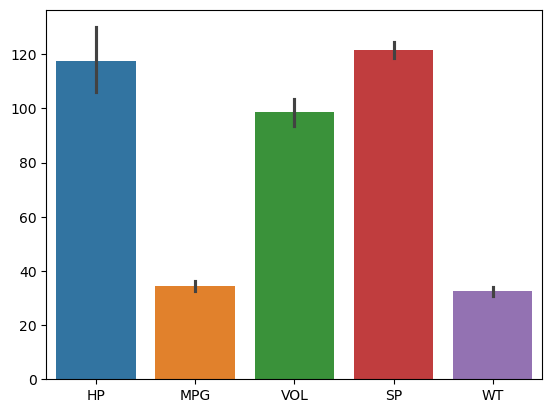

In [34]:
sns.barplot(cars)

<Axes: xlabel='HP', ylabel='VOL'>

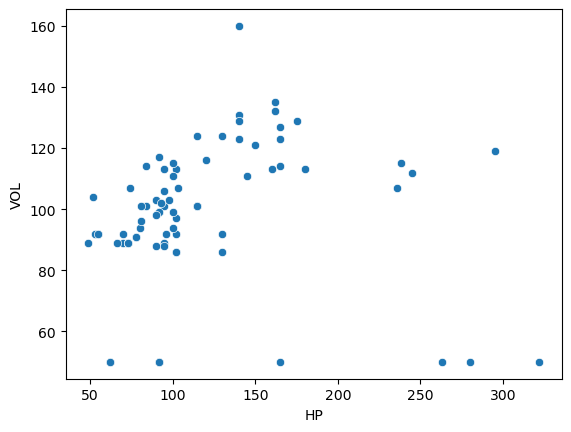

In [36]:
scatterplot(x=cars['HP'],y=cars['VOL'])

<Axes: xlabel='HP', ylabel='SP'>

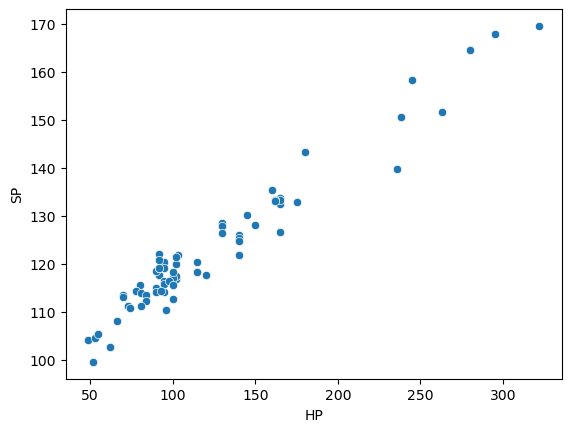

In [38]:
scatterplot(x=cars['HP'],y=cars['SP'])

<Axes: xlabel='WT', ylabel='SP'>

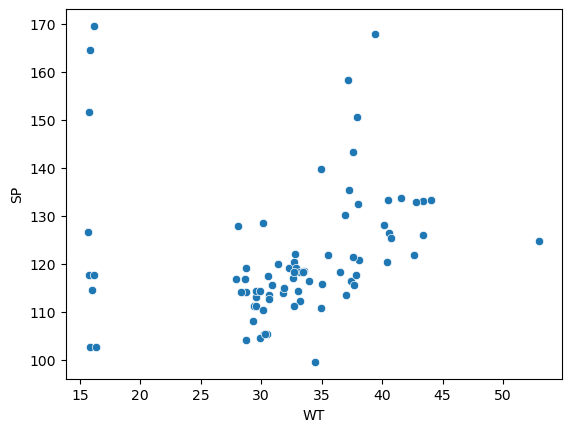

In [40]:
scatterplot(x=cars['WT'],y=cars['SP'])

<Axes: xlabel='HP', ylabel='WT'>

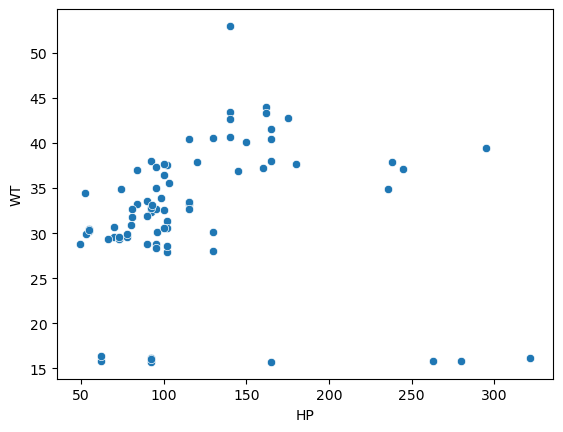

In [42]:
scatterplot(x=cars['HP'],y=cars['WT'])

In [51]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

cars[['HP','WT','VOL','SP']] = sc.fit_transform(cars[['HP','WT','VOL','SP',]])

In [53]:
np.round(cars.describe(),3)

,HP,MPG,VOL,SP,WT
count,81.000,81.000,81.000,81.000,81.000
mean,-0.000,34.422,0.000,0.000,0.000
std,1.006,9.131,1.006,1.006,1.006
min,-1.206,12.101,-2.200,-1.559,-2.243
25%,-0.590,27.856,-0.441,-0.547,-0.379
50%,-0.308,35.153,0.101,-0.236,0.043
75%,0.397,39.532,0.642,0.345,0.669
max,3.603,53.701,2.763,3.410,2.764


In [59]:
import statsmodels.formula.api as smf 
ml_v = smf.ols('MPG ~ VOL', data=cars).fit()  
ml_v.rsquared

0.2799008651122705

In [61]:
ml_v = smf.ols('MPG ~ SP', data=cars).fit()  
ml_v.rsquared

0.4721402334141217

In [63]:
ml_v = smf.ols('MPG ~ HP', data=cars).fit()  
ml_v.rsquared

0.5256806086282022

In [69]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [71]:
model.rsquared

0.7705372737359844

In [73]:
np.round(model.rsquared)

1.0

In [75]:
model.params

Intercept    34.422076
WT            2.982842
VOL          -7.448031
SP            5.575816
HP          -11.660955
dtype: float64

In [77]:
model.rsquared

0.7705372737359844

In [81]:
ml_v.params

Intercept    34.422076
HP           -6.579653
dtype: float64